# Assignment 1

**Deadline**:  Sunday 21 November, 23.59.

Your notebook should not give errors when executed with `Run All`. Please submit your answers via [Canvas](https://canvas.uva.nl/courses/25150/assignments/248822).

| |Name |Student number|Email|
|:-|----|:-------------|:----|
|1.|  |        |     |
|2.|  |        |     |

****Hand in the following****:
* Your notebook. N.B. **click on `Kernel`, then `Restart & Run All`** before submitting, see notes.
* A (printed) pdf version of your notebook.

****NOTES****:
* The assignment is a partial stand-in for a final examination, so the usual rules regarding plagiarism and fraud apply, with all attendant consequences. Code found on the internet or elsewhere is not acceptable as a solution.
* Before submitting your work, **click on `Kernel`, then `Restart & Run All`** and verify that your notebook produces the desired results and does not error.
* Make sure that any function you write has a docstring, and comments where appropriate.
* Some questions require you to write code to obtain a numerical result (e.g., an option price). In that case, don't just give the function, but also the result of calling it with the given parameter values (i.e., the numerial value that it returns). If your function uses random numbers, then set the seed to 0 before calling it. This makes it much easier to grade the assignments (at least as long as the answer is correct).
* How to convert your notebook to pdf: The easiest way is probably to use your browser's print functionality: e.g. in Chrome, press the three dots to go to Options, select 'Print...', and then select 'save as pdf' as Destination. I usually set it to 70% zoom such that the output fits the printed pdf pages.

**Declaration of Originality**:

We whose names are given under 1. and 2. above declare that
1. These solutions are solely our own work.
2. We have not made these solutions available to any other student.

## Question 1: Testing the CAPM
The CAPM implies that
\begin{equation*}
E(R_{i}-R_{f})=\beta _{i}E(R_{m}-R_{f}),\qquad \beta _{i}=\frac{\mathrm{cov}%
(R_{i},R_{m})}{\mathrm{var}(R_{m})},
\end{equation*}

where $R_i$ is the return on a stock, and $R_m$ is the market return. Suppose we have time series on $n$ different stock or portfolio returns $\{R_{it},i=1,\ldots ,n\}_{t=1}^{T}$ and on a "market return" (value weighted index) $\{R_{mt}\}_{t=1}^{T}$.  We also have observations on a risk-free interest rate $\{R_{ft}\}_{t=1}^{T}$ and construct with these the excess returns $r_{it}=R_{it}-R_{ft}$ and $r_{mt}=R_{mt}-R_{ft}$. Now $\beta_i$ can be estimated from the time-series regression \begin{equation*}
r_{it}=\alpha _{i}+\beta _{i}r_{mt}+\varepsilon _{it},\qquad t=1,\ldots ,T.
\end{equation*}

One way to test the CAPM is as follows: denote by $\bar{r}_{i}$
and $\hat{\beta}_{i}$ the average excess return and estimated $\beta$ of stock $i$. If the model $E(r_{i})=\beta_{i}E(r_{m})$ is valid, then $(\hat{\beta}_{i},\bar{r}_{i})$ should lie on a line with zero intercept and slope $\lambda =E(r_{mt})$. This line is called the *security market line*, and $\lambda$ is known as the *market risk premium*.

We can estimate $\lambda $ by OLS in the cross-section regression
\begin{equation*}
\bar{r}_{i}=\lambda \hat{\beta}_{i}+\alpha _{i},\qquad i=1,\ldots ,n.
\end{equation*}
Note that $\hat{\beta_i}$ is the regressor, $\lambda$ the coefficient, and $\alpha_i$ the error term.

The assignment is to estimate the CAPM betas of the 30 constituent stocks of the Dow (using the return on the Dow as the market return, and the 3 month T-bill rate as the risk-free rate), then estimate the above cross-section regression, and finally make a plot of the security market line superimposed on a scatter plot of $(\hat{\beta}_{i},\bar{r}_{i})$.

**1.1** Import the relevant libraries:

In [1]:
import numpy as np
!conda install -y pandas-datareader
import pandas as pd
import pandas_datareader.data as web
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf              
import scipy.stats as stats  
import seaborn as sns
import statsmodels.api as sm

Solving environment: done

# All requested packages already installed.



**1.2** Obtain, from the FRED database, the daily adjusted closing prices of the Dow Jones Industrial Average (DJIA) from 31/12/2011 to 30/09/2021. Convert them into percentage log returns $r_t=100 \times \log(P_t/P_{t-1})$ and store them in a DataFrame `df_1`, which has the date as index and 'DJIA' as column name:

In [2]:
# Create timeseries and import relevant data
start= pd.datetime(2011,12,31)
end=   pd.datetime(2021,9,30)
p=web.DataReader("DJIA","fred",start,end)
#print(p.head())

# Convert to returns
ret= 100*(np.log(p)-np.log(p).shift(1))

# Check some properties
#print(ret.head())
#print(ret.shape)

# Store data in DataFrame
df_1= pd.DataFrame(ret)

# Check some properties of DataFrame
print(df_1.index)
print(" ")
print(df_1.columns)
print(" ")
print(df_1.head())
print(" ")
print(df_1.shape)


/var/folders/yb/4yfj4w257vz1r8lp2kk9492h0000gq/T/ipykernel_65181/2518953720.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start= pd.datetime(2011,12,31)
/var/folders/yb/4yfj4w257vz1r8lp2kk9492h0000gq/T/ipykernel_65181/2518953720.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end=   pd.datetime(2021,9,30)


DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13',
               ...
               '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', name='DATE', length=2544, freq=None)
 
Index(['DJIA'], dtype='object')
 
                DJIA
DATE                
2012-01-02       NaN
2012-01-03       NaN
2012-01-04  0.169569
2012-01-05 -0.021905
2012-01-06 -0.450282
 
(2544, 1)


**1.3** Obtain, also from the FRED database, daily data on the 3-month T-bill rate (DTB3) for the same period and divide them by 365:

In [3]:
# Import 3-month T-bill rate
r_f=web.DataReader("DTB3","fred",start,end)
#print(r_f.head())

rf= r_f/365
print(rf.head())


                DTB3
DATE                
2012-01-02       NaN
2012-01-03  0.000055
2012-01-04  0.000055
2012-01-05  0.000055
2012-01-06  0.000055


**1.4** The csv file `tickerdata.csv` which has been provided with this assignment contains the adjusted closing prices for the 30 constituent stocks of the Dow Jones.

Import the dataset into a second DataFrame `df_2`, convert the `Date`-column to datetime, and make the `Date`-column the new index:

In [4]:
# Import tickerdata and store it in new dataframe

df_2=pd.read_csv("tickerdata.csv")
df_2=pd.DataFrame(df_2)
#print(df_2.head())

# Convert column "Date" to datetime datatype
df_2["Date"]=pd.to_datetime(df_2["Date"])

# Set date as index
df_2=df_2.set_index("Date")

# Check some properties of df_2
print(df_2.head())
print(" ")
print(df_2.index)
print(" ")
print(df_2.columns)
print(" ")




                 AAPL       AMGN        AXP         BA        CAT        CRM  \
Date                                                                           
2012-01-03  12.610315  50.510731  41.869728  60.731098  71.366051  25.299999   
2012-01-04  12.678082  50.234978  41.895790  60.821098  72.026718  24.370001   
2012-01-05  12.818840  50.747097  42.382149  60.166496  72.535507  24.692499   
2012-01-06  12.952843  51.022858  41.921841  60.534721  72.717773  25.264999   
2012-01-09  12.932299  50.581646  42.026062  60.984764  73.735329  25.187500   

                 CSCO        CVX        DIS         DD  ...        MRK  \
Date                                                    ...              
2012-01-03  13.845226  73.995338  34.300625  32.105747  ...  26.613436   
2012-01-04  14.112767  73.867928  34.784103  32.278187  ...  26.641226   
2012-01-05  14.060745  73.143867  35.366070  32.482964  ...  26.919172   
2012-01-06  14.008723  72.614235  35.733166  32.676949  ...  26.73155

**1.5** Using a `for` loop (over the columns), convert all the given adjusted closing prices into percentage log returns $r_t=100\log(P_t/P_{t-1})$:

In [5]:
# Convert prices into percantage log returns using for loop

for i in df_2:
    df_2Ri= 100*(np.log(df_2)-np.log(df_2).shift(1))

print(df_2Ri.head())


                AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-04  0.535956 -0.547425  0.062226  0.148085  0.921486 -3.745146   
2012-01-05  1.104125  1.014286  1.154191 -1.082108  0.703906  1.314662   
2012-01-06  1.039931  0.541931 -1.092031  0.610145  0.250963  2.292049   
2012-01-09 -0.158732 -0.868494  0.248300  0.740696  1.389621 -0.307217   

                CSCO       CVX       DIS        DD  ...       MRK      MSFT  \
Date                                                ...                       
2012-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2012-01-04  1.913936 -0.172336  1.399691  0.535662  ...  0.104367  2.326118   
2012-01-05 -0.369298 -0.985045  1.659240  0.632408  ...  1.037890  1.016695   
2012-01-06 -0.370666 -0.726731  1.032639  0.595414  ... -0.699402  1.541527   
2012-01

**1.6** Concatenate DataFrames `df_1` and `df_2` along the common axis to a final DataFrame `df`:


Notes (also hold for next question):
* Need to specify the axis
* `dtype` of the indices should be the same

In [6]:
# Assign values df_2Ri to df_2 for convenience

df_2=df_2Ri

# Check if indices have the same datatype

print(df_1.dtypes);print(df_2.dtypes)

# Construct dataframe with both market index as underlying stocks

df=pd.concat([df_1,df_2],axis=1)
print(df.head())


DJIA    float64
dtype: object
AAPL    float64
AMGN    float64
AXP     float64
BA      float64
CAT     float64
CRM     float64
CSCO    float64
CVX     float64
DIS     float64
DD      float64
GS      float64
HD      float64
HON     float64
IBM     float64
INTC    float64
JNJ     float64
JPM     float64
KO      float64
MCD     float64
MMM     float64
MRK     float64
MSFT    float64
NKE     float64
PG      float64
TRV     float64
UNH     float64
V       float64
VZ      float64
WBA     float64
WMT     float64
dtype: object
                DJIA      AAPL      AMGN       AXP        BA       CAT  \
2012-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-04  0.169569  0.535956 -0.547425  0.062226  0.148085  0.921486   
2012-01-05 -0.021905  1.104125  1.014286  1.154191 -1.082108  0.703906   
2012-01-06 -0.450282  1.039931  0.541931 -1.092031  0.610145  0.250963   

                 CRM      CSCO 

**1.7** Convert the raw returns in `df` to excess returns by subtracting the `pandas` series `rf` from all columns:

In [7]:
# Convert rf from dataframe into Series
rf=pd.Series(rf["DTB3"])
#print(type(rf))

# Substract rf from df over the rows
df=df.subtract(rf,axis="index")
print(df.head())





                DJIA      AAPL      AMGN       AXP        BA       CAT  \
2012-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-04  0.169515  0.535901 -0.547480  0.062171  0.148030  0.921431   
2012-01-05 -0.021960  1.104071  1.014232  1.154136 -1.082163  0.703851   
2012-01-06 -0.450337  1.039876  0.541876 -1.092085  0.610090  0.250909   

                 CRM      CSCO       CVX       DIS  ...       MRK      MSFT  \
2012-01-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2012-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2012-01-04 -3.745201  1.913882 -0.172391  1.399636  ...  0.104312  2.326064   
2012-01-05  1.314607 -0.369352 -0.985099  1.659185  ...  1.037835  1.016640   
2012-01-06  2.291995 -0.370721 -0.726786  1.032584  ... -0.699457  1.541472   

                 NKE        PG       TRV       UNH         V        VZ  \
2012-0

**1.8** Drop all rows from `df` that contain at least one NaN:

In [8]:
#print(df.shape)

# Drop rows with any NaN-values and check with commented print option above how many rows have been deleted
df=df.dropna(axis=0, how="any")
print(df.shape)

(2346, 31)


**1.9** Use a `for` loop to estimate a CAPM time series regression for each stock, and store the estimated slope coefficient in a list. 

*Hint*: use string interpolation to construct the regression equation and use the list `tickers` below, containing the ticker symbols of all 30 constituent stocks of the DJIA.

In [9]:
tickers = ["AAPL", "AMGN", "AXP", "BA", "CAT", "CRM", "CSCO", "CVX", "DIS", "DD",
            "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", 
            "MRK", "MSFT", "NKE", "PG", "TRV", "UNH", "V", "VZ", "WBA","WMT"]

In [10]:
# Create an empty list to append betas
Betas=[]      

# OLS regression using for loop and appends coefficient of 'DJIA' to empty Betas list

for i in tickers:
    result= smf.ols(i + '~DJIA', data=df).fit(cov_type= 'HAC',cov_kwds={'maxlags':5})
    
    Betas.append(result.params['DJIA'])

print(Betas)


[1.0123805371791255, 0.843988927715863, 1.2671965532092107, 1.546305665399263, 1.1613003720474417, 1.058424903768695, 0.9946973373365443, 1.2105287443091646, 0.9877328533294722, 1.1823931518044408, 1.2938977147341713, 0.9904804122066533, 1.068795699806526, 0.9701575607860277, 1.1111529041488155, 0.6658307234508307, 1.2496648246365416, 0.6751687869344227, 0.7802988996874127, 0.9078587551384667, 0.6844055685129881, 1.0580233898967404, 0.9307321413785774, 0.6098461363854872, 0.9614686396139731, 1.0044320758791154, 1.0803973954604005, 0.5364298211547747, 0.840926007747768, 0.5286295956180211]


**1.10** Create a new dataframe that has `tickers` as index, and two columns: `beta`, containing the 30 estimated betas, and `meanret`, containing the mean excess returns of the 30 stocks:

In [11]:

# In order to construct variable meanret, containing mean excess returns of stocks
meanret=[]

for i in tickers:
    meanret.append(df[i].mean())

# Construct dataframe for Stock betas & mean excess returns with tickers as index
df_3={'Bi':Betas, 'E(Ri)':meanret}
df3= pd.DataFrame(data=df_3,index= tickers)
print(df3.head())





            Bi     E(Ri)
AAPL  1.012381  0.089613
AMGN  0.843989  0.061284
AXP   1.267197  0.055363
BA    1.546306  0.051763
CAT   1.161300  0.047535


**1.11** Estimate the security market line by a cross-sectional regression (without intercept), and print a summary of the result:

In [12]:
# Regression: STOCKi= BETAi * DJIA
SML = smf.ols('meanret ~ -1 + Betas', data=df3).fit()
print(SML.summary2())


                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.832     
Dependent Variable:     meanret          AIC:                         -135.9810 
Date:                   2021-11-21 20:04 BIC:                         -134.5798 
No. Observations:       30               Log-Likelihood:              68.990    
Df Model:               1                F-statistic:                 149.3     
Df Residuals:           29               Prob (F-statistic):          5.82e-13  
R-squared (uncentered): 0.837            Scale:                       0.00060921
--------------------------------------------------------------------------------------
            Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
--------------------------------------------------------------------------------------
Betas       0.0550         0.0045       12.2199       0.0000       0.0458       0.0642
-----------------------------

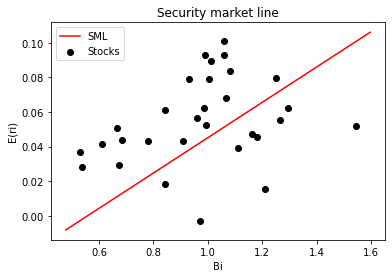

In [13]:
# Create scatterplot of Stocks

plt.scatter(Betas, meanret, c = "Black", label = "Stocks")

# Define x-axis and y-axis

Betas = plt.xlim()
meanret = plt.ylim()

# Create Security market line

plt.plot(Betas, meanret, c = "Red", label = "SML")

# Figure properties/labels

plt.xlabel('Bi')
plt.ylabel('E(ri)')
plt.legend()
plt.title('Security market line')


plt.show()

**1.12** Make a scatter plot of $(\hat{\beta}_{i},\bar{r}_{i})$ and overlay it with a red regression line (the security market line). Add a title and legend, and label the axes:

## Question 2: Value at Risk
In this question we construct a VaR estimates for two stocks, one high risk and one low risk stock. Further, for the high risk stock, we split the sample into two periods to evaluate the VaR out-of-sample. You can re-use the data from the previous question.

**2.1** Use the above estimates to identify the most risky and the least risky stock in terms of their estimated betas. Create two `pandas` series `r_hirisk` and `r_lorisk` from the `df` DataFrame.

In [14]:
# From df3, we conclude that, in terms of market risk, BA has the highest risk (B= 1.55) and that WMT has the lowest risk (B=0.53\)#print(df3) 
#print(df3)
# Create pandas series for highest risk and lowest risk stocks

r_hirisk= pd.Series(df['BA'])
r_lorisk= pd.Series(df['WMT'])

# Check if new created pandas series correspond to DataFrame df
print(df['BA'].head())
print(r_hirisk.head())

print(df['WMT'].head())
print(r_lorisk.head())



2012-01-04    0.148030
2012-01-05   -1.082163
2012-01-06    0.610090
2012-01-09    0.740668
2012-01-10    0.628548
Name: BA, dtype: float64
2012-01-04    0.148030
2012-01-05   -1.082163
2012-01-06    0.610090
2012-01-09    0.740668
2012-01-10    0.628548
Name: BA, dtype: float64
2012-01-04   -1.033052
2012-01-05   -0.486907
2012-01-06   -0.709415
2012-01-09    0.304599
2012-01-10   -0.236870
Name: WMT, dtype: float64
2012-01-04   -1.033052
2012-01-05   -0.486907
2012-01-06   -0.709415
2012-01-09    0.304599
2012-01-10   -0.236870
Name: WMT, dtype: float64


**2.2** For both stocks, create a 1% VaR estimate, assuming a $t$ distribution. Comment on the difference between the estimates.

In [15]:
# fit a location scale distribution for both the risky stock as the low-risk stock

df,m,h= stats.t.fit(r_lorisk)
df2,m2,h2= stats.t.fit(r_hirisk)


# Create VaR estimates for both r_hirisk & r_lorisk assuming t-distribution

VaR_lo= -stats.t.ppf(0.01,df,loc=m,scale=h)
VaR_hi= -stats.t.ppf(0.01,df2,loc=m2,scale=h2)


print("The VaR-estimate for the high risk stock is", str(round(VaR_hi,3)))
print("The VaR-estimate for the low risk stock is",str(round(VaR_lo,3)))
print(" ")
print("While for the low-risk stock we can say with 99% certainty that an eventual loss will not exceed 3.078%, for the risky stock this is 6.022%. This could be interpreted as that the lower-bound 99% confidence interval for the low risk stock is narrower. This is completely in line with BA stock being riskier than the WMT stock. In terms of Betas the risky stock is almost 3 times riskier, while in terms of VaR this is 2 times. This is because the VaR includes firm-specific risk which is not measured by the beta")



The VaR-estimate for the high risk stock is 6.022
The VaR-estimate for the low risk stock is 3.078
 
While for the low-risk stock we can say with 99% certainty that an eventual loss will not exceed 3.078%, for the risky stock this is 6.022%. This could be interpreted as that the lower-bound 99% confidence interval for the low risk stock is narrower. This is completely in line with BA stock being riskier than the WMT stock. In terms of Betas the risky stock is almost 3 times riskier, while in terms of VaR this is 2 times. This is because the VaR includes firm-specific risk which is not measured by the beta


**Answer the following questions for the *risky stock* only.**

**2.3** Test the fit of the Student's *t* distribution using a QQ plot, and give a conclusion in words.

/Users/evaribbink/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


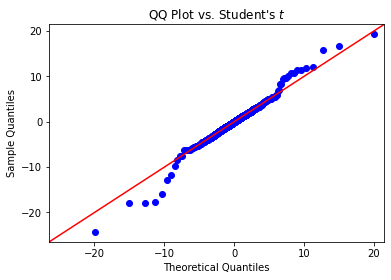

In the QQ-plot above we see that, except for the tails, the t-distribution fits the actual distribution well. This is shown by the fact that between the theoretical quantiles (-10,10) the blue points lie on the 45 degrees line. However, the deviations below and beyond the 45 degree line in the right and left hand side indicate signs of heavy tails (caused by extreme outliers). These outliers should be therefore considered and maybe controlled when using regressions


In [16]:

sm.qqplot(r_hirisk, dist=stats.t, fit=True, line='45')
plt.title("QQ Plot vs. Student's $t$")
plt.show()

print("In the QQ-plot above we see that, except for the tails, the t-distribution fits the actual distribution well. This is shown by the fact that between the theoretical quantiles (-10,10) the blue points lie on the 45 degrees line. However, the deviations below and beyond the 45 degree line in the right and left hand side indicate signs of heavy tails (caused by extreme outliers). These outliers should be therefore considered and maybe controlled when using regressions")

**2.4** Make a plot consisting of two subplots, the left of which shows $-R_t$ and $VaR^{0.01}$, and the right panel showing a histogram of $R_t$ overlaid with the fitted Student's *t* distribution. Make sure to add title, legend, and axis labels.

*Hint*: The Value at Risk $VaR^{0.01}$ is constant over time, so the plot of the VaR will be a horizontal line.

/Users/evaribbink/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rt histogram with t-distribution')

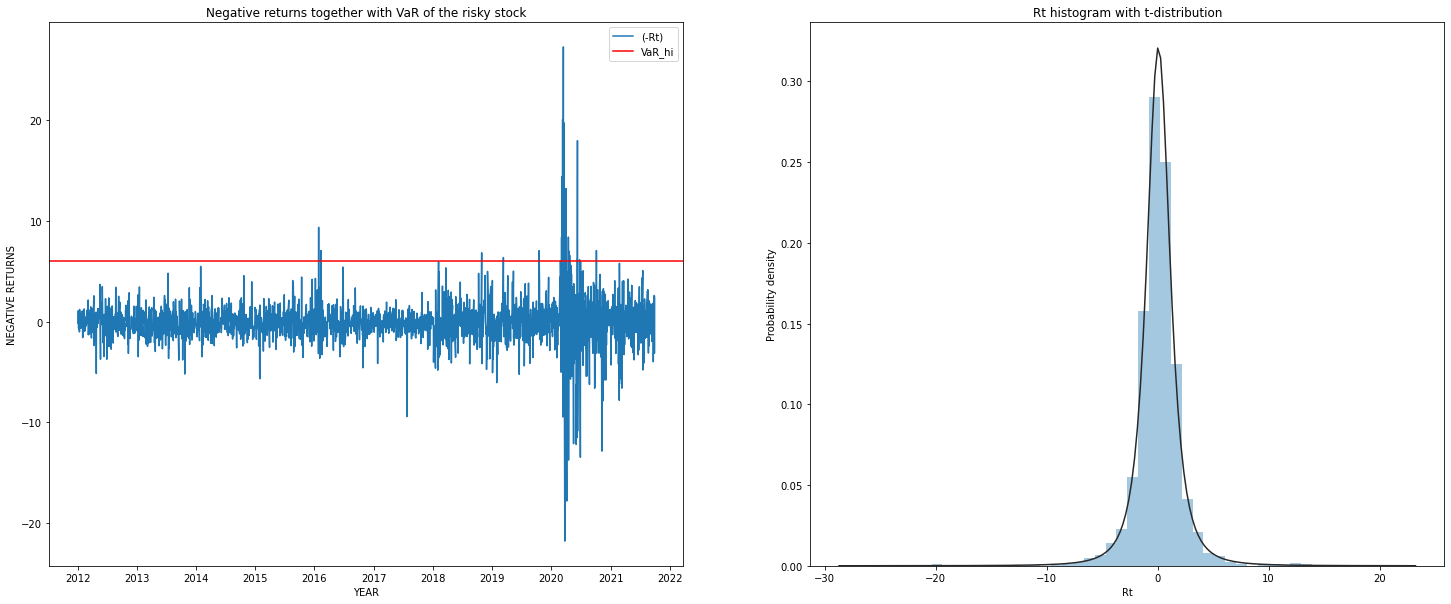

In [17]:
# Re-define r_hirisk

Rt=r_hirisk
Rt_negative= -r_hirisk

# Define new figure

fig=plt.figure(figsize=(25,10))

# Add subplot to "fig" containing -Rt & VaR_hi

ax1 = fig.add_subplot(121)
ax1.plot(Rt_negative, label='(-Rt)')
ax1.axhline(VaR_hi, color = 'r',label = 'VaR_hi')

# Add figure properties

plt.xlabel('YEAR')
plt.ylabel('NEGATIVE RETURNS')
#plt.title('Negative Returns together with Var_HS and VaR_N')
plt.legend()
plt.title('Negative returns together with VaR of the risky stock')

# Add subplot to "fig" which shows the histogram of Rt, overlaid with the fitted Stundent's t distribution

ax2=fig.add_subplot(122)
sns.distplot(Rt, kde=False, fit=stats.t)   

# Add figure properties

plt.xlabel('Rt')
plt.ylabel('Probability density')
plt.title( 'Rt histogram with t-distribution')




**2.5** Finally, split the sample of `r_hirisk` into two parts: one sample from 2012-2019, and one sample from 2020-2021. Use the first sample (2012-2019) to compute the 1% VaR assuming a Student's $t$ distribution as before. Then, use the second sample to evaluate the VaR by counting the number of exceedances in the period 2020-2021. Give a conclusion in words.

*Bonus* Does your conclusion change if you evaluate the VaR based on returns in 2021 only?